In [19]:
#Loading Data Tool Packages
import pandas as pd
import numpy as np
import json

#Packages for plotting
import seaborn as sns
import matplotlib.pyplot as plt

#Packages for datetime conversions
import time
import datetime as dt
from datetime import datetime

#Packages for Web-scraping
import urllib
import re
from bs4 import BeautifulSoup
import csv
import requests

#Machine Learning
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [24]:
AGLE = r'C:\Users\chappie\Documents\GitHub\Predicting_Biotech_Stock_Performance\Predicting-Biotech-Stock-Performance\Yearly_Stock_Data\AGLE.csv'
pdAGLE = pd.read_csv(AGLE)
pdAGLEIndex = pd.read_csv(AGLE, index_col=0, parse_dates=True)

uniqueDateTime = pdAGLE.DateTime.unique()
print("Unique Rows based on DateTime:", len(uniqueDateTime))
print("Current Rows from Table:", len(pdAGLE))

pdAGLE = pdAGLE.iloc[:5031]
pdAGLEIndex = pdAGLEIndex.iloc[:5031]
uniqueDateTimeIndex = pdAGLE.DateTime.unique()
print("Unique Rows based on DateTimeIndex:", len(uniqueDateTimeIndex))
print("Current Rows from Table_Index:", len(pdAGLEIndex))
print("Current Column Names:", pdAGLEIndex.keys())

Unique Rows based on DateTime: 5031
Current Rows from Table: 15093
Unique Rows based on DateTimeIndex: 5031
Current Rows from Table_Index: 5031
Current Column Names: Index(['Time', 'Open', 'Low', 'Close', 'Volume'], dtype='object')


In [28]:
pdAGLE.shape
print(AGLE)

C:\Users\chappie\Documents\GitHub\Predicting_Biotech_Stock_Performance\Predicting-Biotech-Stock-Performance\Yearly_Stock_Data\AGLE.csv


In [21]:
#Add Separate Columns for Day, Month, Year, Month Names, and Season to dataframe
def dateTimeConversion(df):
    #Arrays for Appending
    yearArr = []
    monthArr = []
    monthNamesArr = []
    dayArr = []
    seasonArr = []
    #Months & Seasons (Spring: March-May/03-05, Summer: June-August/06-08, Fall/Autumn: )
    monthNames = ['','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    #Fall/Autumn: September, October, November [09-11]
    #Winter: December, January, February [12-02]
    seasonNames = ['','Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer','Summer','Summer','Fall','Fall','Fall','Winter']
    for x in df.DateTime:
        datetimestrp = datetime.strptime(x, '%Y-%m-%d')
        yearArr.append(datetimestrp.year)
        monthArr.append(datetimestrp.month)
        dayArr.append(datetimestrp.day)
       # print(monthNames[int(datetimestrp.month)])
        monthNamesArr.append(monthNames[int(datetimestrp.month)])
        seasonArr.append(seasonNames[int(datetimestrp.month)])
    df['Month'] = monthArr
    df['Day'] = dayArr
    df['Year'] = yearArr
    df['MonthName'] = monthNamesArr
    df['Season'] = seasonArr
    
    return df


newpd = dateTimeConversion(pdAGLE)
newpd['DateandTime'] = newpd['DateTime']
newpd = newpd.sort_values(by=['DateTime'],ascending=True)
newpd.index = range(1,len(newpd) + 1)
newpd['Open_to_Close'] = newpd.Open - newpd.Close

#newpdTwo = dateTimeConversion(pdAGLEIndex)
newpdTwo = pdAGLEIndex.sort_index(ascending=True)
#newpdTwo.index = range(1,len(newpdTwo) + 1)
newpdTwo['Open_to_Close'] = newpdTwo.Open - newpdTwo.Close

startframe = newpdTwo[0:1]
endframe = newpdTwo[-1:]

print("Start:End", startframe.index.values,":", endframe.index.values)

Start:End ['2000-04-20T00:00:00.000000000'] : ['2020-04-21T00:00:00.000000000']


In [29]:
newpdTwo.describe()

,Open,Low,Close,Volume,Open_to_Close
count,5031.000000,5031.000000,5031.000000,5.031000e+03,5031.000000
mean,48.230014,47.704880,48.238742,4.934039e+07,-0.008728
std,31.781844,31.414291,31.788071,2.847647e+07,0.899598
min,15.200000,14.870000,15.150000,5.850800e+06,-11.330000
25%,26.940000,26.749500,26.950000,2.970849e+07,-0.300000
50%,32.160000,31.920000,32.200000,4.460720e+07,0.000000
75%,58.500000,57.780000,58.240000,6.147070e+07,0.260000
max,190.650000,186.470000,188.700000,5.910522e+08,9.290000


In [22]:
print(newpdTwo.head(10))

                Time   Open    Low  Close       Volume  Open_to_Close
DateTime                                                             
2000-04-20  00:00:00  78.62  77.50  78.94   26193700.0          -0.32
2000-04-24  00:00:00  67.25  65.00  66.62  156822900.0           0.63
2000-04-25  00:00:00  68.75  67.62  69.37   79758700.0          -0.62
2000-04-26  00:00:00  70.00  67.37  68.00   53545600.0           2.00
2000-04-27  00:00:00  67.44  67.37  69.81   38834900.0          -2.37
2000-04-28  00:00:00  70.75  68.25  69.75   39041300.0           1.00
2000-05-01  00:00:00  72.87  71.69  73.44   53905500.0          -0.57
2000-05-02  00:00:00  72.81  69.50  69.87   48858100.0           2.94
2000-05-03  00:00:00  70.37  68.81  70.56   27677400.0          -0.19
2000-05-04  00:00:00  70.31  69.31  70.44   21658600.0          -0.13


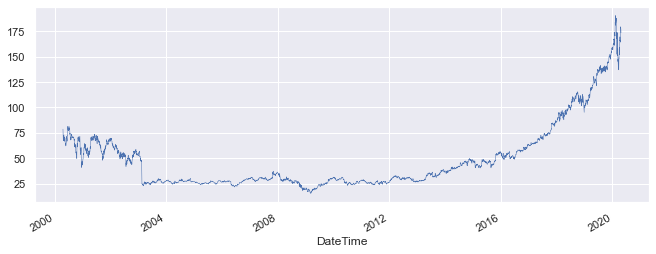

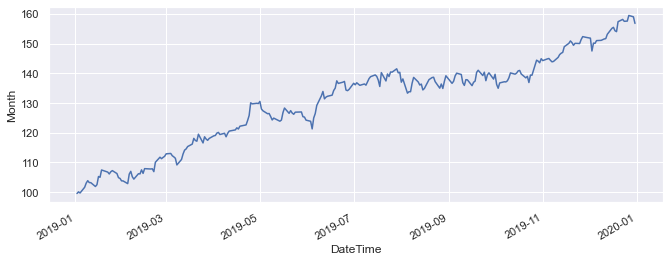

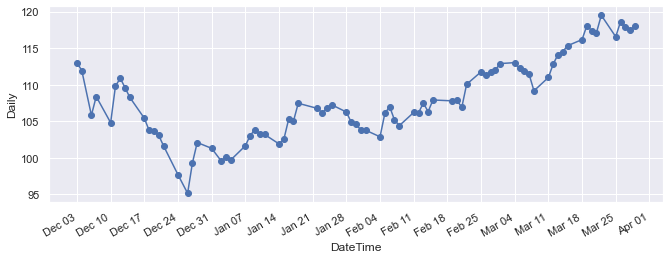

In [23]:
import matplotlib.dates as mdates

sns.set(rc={'figure.figsize':(11, 4)})
newpdTwo.Open.plot(linewidth=0.5)
plt.show()

ax = newpdTwo.loc['2019','Open'].plot()
ax.set_ylabel('Month')
plt.show()

ax2 = newpdTwo.loc['2018-12':'2019-03', 'Open'].plot(marker='o', linestyle='-')
ax2.set_ylabel('Daily');
# Set x-axis major ticks to weekly interval, on Mondays
ax2.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
#Why is matplotlib slower than sns?


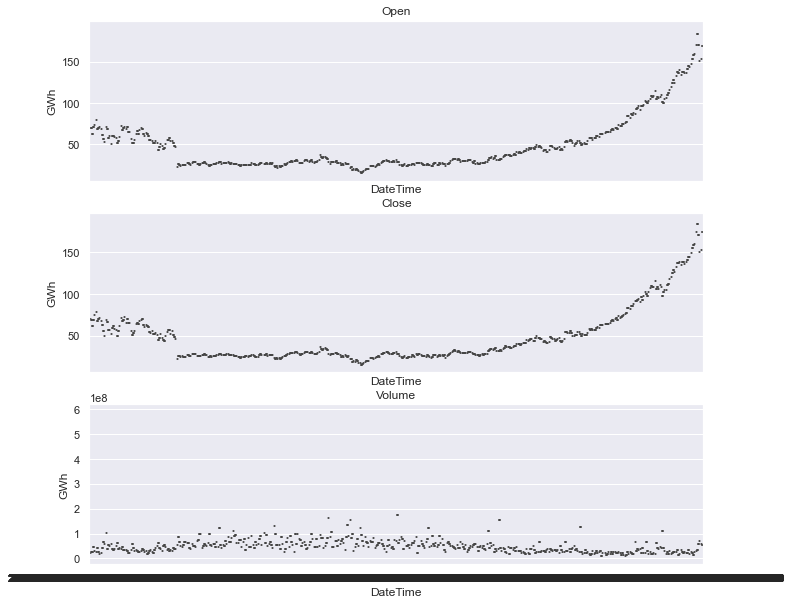

In [6]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Open','Close','Volume','Open_to_Close'], axes):
    sns.boxplot(data=newpdTwo, x=newpdTwo.index, y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

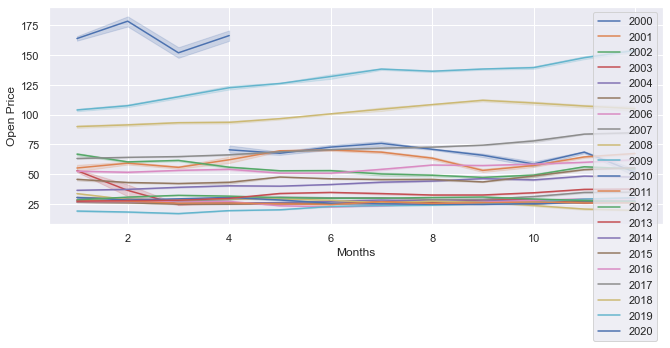

<Figure size 1440x1440 with 0 Axes>

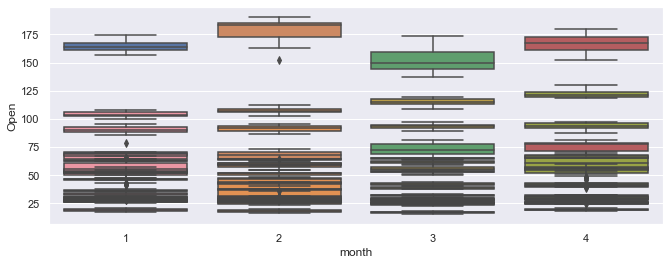

<Figure size 1440x1440 with 0 Axes>

Running Complete


In [9]:
#Design a function for any data table to graph all yearly data on one graph with the x-axis as Month and y-axis as price.
def graphMultipleYears(df,column):
    
    #Grabbing the unique values (history) for years, months, and day
    df['year'] = [d.year for d in df.index]
    years = pd.unique(df.year)
    #years = df.year.unique()
    df['month'] = [d.month for d in df.index]
    months = pd.unique(df.month)
    df['day'] = [d.day for d in df.index]
    
    #Mapping the Month and Day together for future use when setting the index
    #df['month_day'] = df['month'].map(str) +'-'+ df['day'].map(str)
    #df['month_day'] = df['month'] +'-'+ df['day']
    #Establish arrays
    monthNamesArr = []
    seasonArr = []
    
    for m in df.month:
        #Months & Seasons (Spring: March-May/03-05, Summer: June-August/06-08, Fall/Autumn: )
        monthNames = ['','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
        #Fall/Autumn: September, October, November [09-11]
        #Winter: December, January, February [12-02]
        seasonNames = ['','Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer','Summer','Summer','Fall','Fall','Fall','Winter']
        monthNamesArr.append(monthNames[int(m)])
        seasonArr.append(seasonNames[int(m)])
        
    #Assign New Columns
    df['MonthName'] = monthNamesArr
    df['Season'] = seasonArr
    #Loop through each year
    for year in years:
        #Gather the filtered dataframe by year
        eachYear = df.loc[str(year)]
        
        #Set Index with month and day combined by dash ("-")
        #month = eachYear.set_index('month_day')
        
        
        #print(eachYear)
        
        #Matplotlib
        ax = sns.lineplot(x='month',y='Open',data=eachYear,label=year)
    
    ax.set(xlabel='Months',ylabel='Open Price')
    plt.figure(figsize=(20,20))
    plt.show()
    
    
    for year in years:
        #Gather the filtered dataframe by year
        eachYear = df.loc[str(year)]

        #Set Index with month and day combined by dash ("-")
        #month = eachYear.set_index('month_day')


        #print(eachYear)

        #Matplotlib
        sns.boxplot(x='month',y='Open',data=eachYear)
        
    plt.figure(figsize=(20,20))
    plt.show()
    """
    for year in years:
        ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-')
        ax.set_ylabel('Daily Consumption (GWh)');
        sns.boxplot(x='year',y='Open',data=df)
    """
    
#plt.yticks([0, 2, 4, 6, 8, 10])
graphMultipleYears(newpdTwo, 'Open')
print("Running Complete")


#grab the month if = (January for hte 1st month)

In [10]:
print(newpdTwo.head(1))

                Time   Open   Low  Close      Volume  Open_to_Close  year  \
DateTime                                                                    
2000-04-20  00:00:00  78.62  77.5  78.94  26193700.0          -0.32  2000   

            month  day MonthName  Season  
DateTime                                  
2000-04-20      4   20     April  Spring  


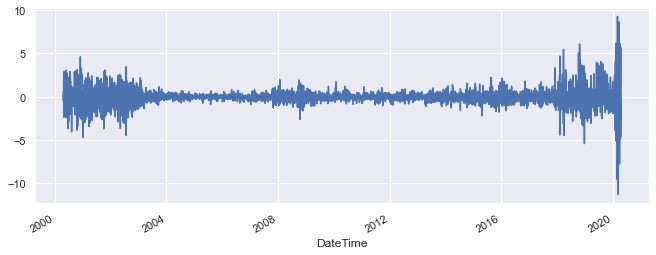

In [11]:
start_date = datetime(2000, 4, 20)
end_date = datetime(2020, 4, 21)
testpdTwo = newpdTwo.Open_to_Close

"""
unnormalizeddf = newpdTwo.groupby(newpdTwo.index.month).Open_to_Close.mean()
groupbyData = newpdTwo.groupby(newpdTwo.index.month)
groupbyData.plot()
#unnormalizeddf.plot(kind='bar')
normalvalues= unnormalizeddf.values
normalvalues = normalvalues.reshape(1, -1)
mms = MinMaxScaler()
Xn = mms.fit_transform(normalvalues)
print(Xn.min(axis=0))

"""


"""
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))
x_scaled = min_max_scaler.fit_transform(normalvalues)
noramlizeddf = pd.DataFrame(x_scaled)
#print(noramlizeddf)
#normalizeddf.plot(kind='bar')
#testpdTwo.groupby(testpdTwo.index.month).Open_to_Close.mean()

"""
testpdTwoPlot = testpdTwo[(start_date <= newpdTwo.index)&(newpdTwo.index <= end_date)].plot(grid=True)

Index(['Time', 'Open', 'Low', 'Close', 'Volume', 'Open_to_Close', 'year',
       'month', 'day', 'MonthName', 'Season'],
      dtype='object')


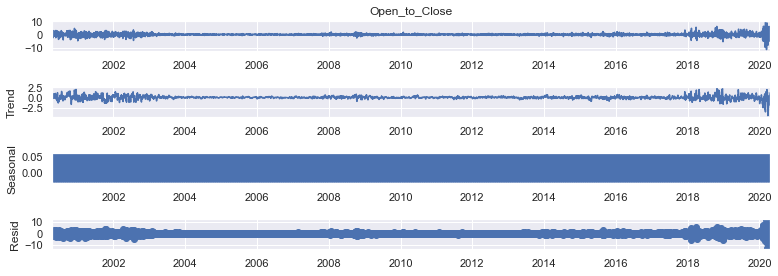

In [12]:
import statsmodels.api as sm
print(newpdTwo.keys())
decomposeModel = newpdTwo['Open_to_Close']
decomposeModel = decomposeModel.asfreq('d')
decomposeModel = decomposeModel.fillna(method='bfill').fillna(method='ffill')
decomposition = sm.tsa.seasonal_decompose(decomposeModel, model='additive')
figure = decomposition.plot()
plt.rcParams['figure.figsize'] = [9.0,5.0]

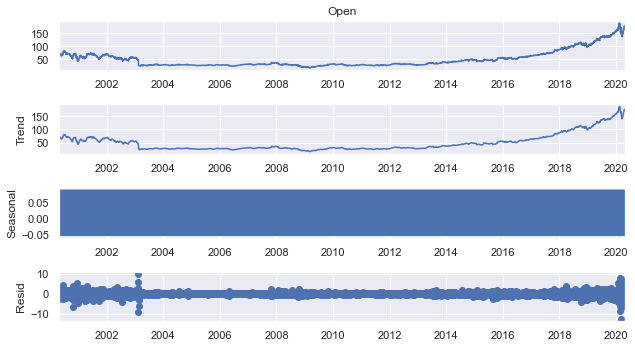

In [13]:
decomposeModel = newpdTwo['Open']
decomposeModel = decomposeModel.asfreq('d')
decomposeModel = decomposeModel.fillna(method='bfill').fillna(method='ffill')
decomposition2 = sm.tsa.seasonal_decompose(decomposeModel, model='additive')
figure = decomposition2.plot()
plt.rcParams['figure.figsize'] = [9.0,5.0]

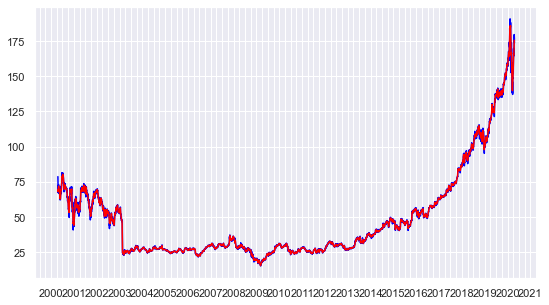

In [14]:

"""
#newpd['DateTime'] = pd.to_datetime(newpd['DateTime'])
#newpd = newpd.set_index('DateTime')
print(newpd['Open'].head())
newpd['Open'].plot(grid=True)
newpd = newpd.drop(['Time'], axis=1)
"""

fig, ax = plt.subplots()
ax.grid(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)

year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')

ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)

SMALL_SIZE=4
plt.plot(newpdTwo['Open'].index, newpdTwo['Open'], c='blue')
plt.rc('xtick', labelsize=SMALL_SIZE) 
plt.plot(decomposition2.trend.index, decomposition2.trend, c='red')
plt.rc('xtick', labelsize=SMALL_SIZE) 

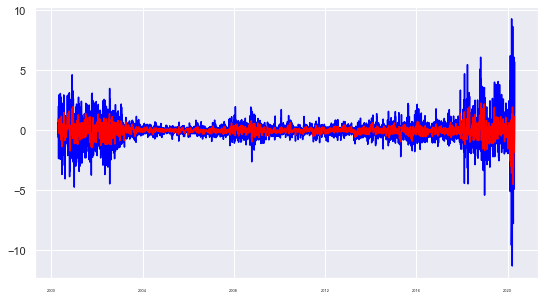

In [15]:
plt.plot(newpdTwo['Open_to_Close'].index, newpdTwo['Open_to_Close'], c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')